In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
from autoviml.Auto_ViML import Auto_ViML #install with pip

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.677. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
The new Auto_ViML can solve multi-label, multi-output problems. Check if your version is >= 0.1.669
To get the latest version, perform "pip install autoviml --no-cache-dir --

In [2]:
data = pd.read_csv("C:/Users/arian/Desktop/CleanCovid.csv")
data = data.drop(["Unnamed: 0"],axis=1)
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,...,Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),gravity
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,126e9dd13932f68,17,negative,0,0,0,"0,2365154475","-0,0223402679","-0,5174130201","0,01067657024","0,1020041853","0,3183657527","-0,9507903457","-0,09461034834","-0,2237665057","-0,2922693193","1,482158184","0,1661923975","0,3575466573","-0,6250726581","-0,1406480819",not_detected,not_detected,not_detected,not_detected,not_detected,detected,nan,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,"-0,6190860271","1,198059082","-0,1478949487","2,089928389","-0,3057871461","0,8625116348",negative,negative,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,

# Auto_ViML experiment:

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (5644, 112)
    Training Set Memory Usage = 4.82 MB
Single_Label Target: ['SARS-Cov-2 exam result']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
    negative:    5086  ->   90.1%
    positive:     558  ->    9.9%
String or Multi Class target: SARS-Cov-2 exam result transformed as follows: {'negative': 0, 'positive': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    111 Predictors classified...
        This does not include the Target column(s)
    74 variables removed since they were ID or low-information variables
        ['Patient ID', 'Serum Glucose', 'Mycoplasma pneumoniae', 'Parainfluenza 2', 'Neutrophils', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium', 'Alanine

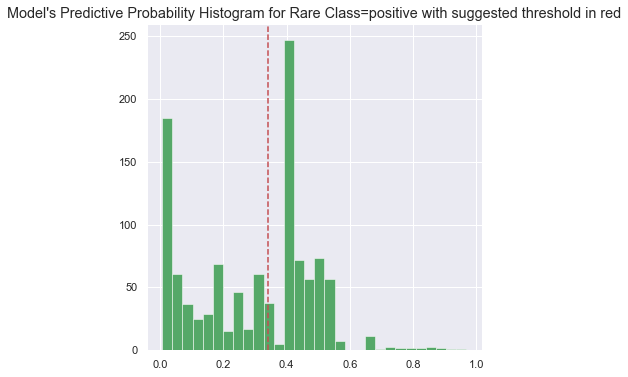

    Using threshold=0.5. However, 0.342 provides better F1=0.23 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 54.9%
Balanced Accuracy = 54.90% with Threshold = 0.50
Confusion Matrix:
[[926  91]
 [ 91  21]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1017
           1       0.19      0.19      0.19       112

    accuracy                           0.84      1129
   macro avg       0.55      0.55      0.55      1129
weighted avg       0.84      0.84      0.84      1129

Balanced Accuracy = 61.42% with Threshold = 0.34
Confusion Matrix:
[[541 476]
 [ 34  78]]
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1017
           1       0.14      0.70      0.23       112

    accuracy                           0.55      1129
   macro avg       0.54      0.61      0.46

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 13
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
Training model now on resampled train data: (7876, 9). This will take time...
    Resampled data Training time taken = 3 seconds
##################  Completed Imbalanced Training using XGBClassifier ################
     Actual Training time taken in seconds = 4
Training of models completed. Now starting predictions on test data...
Since the

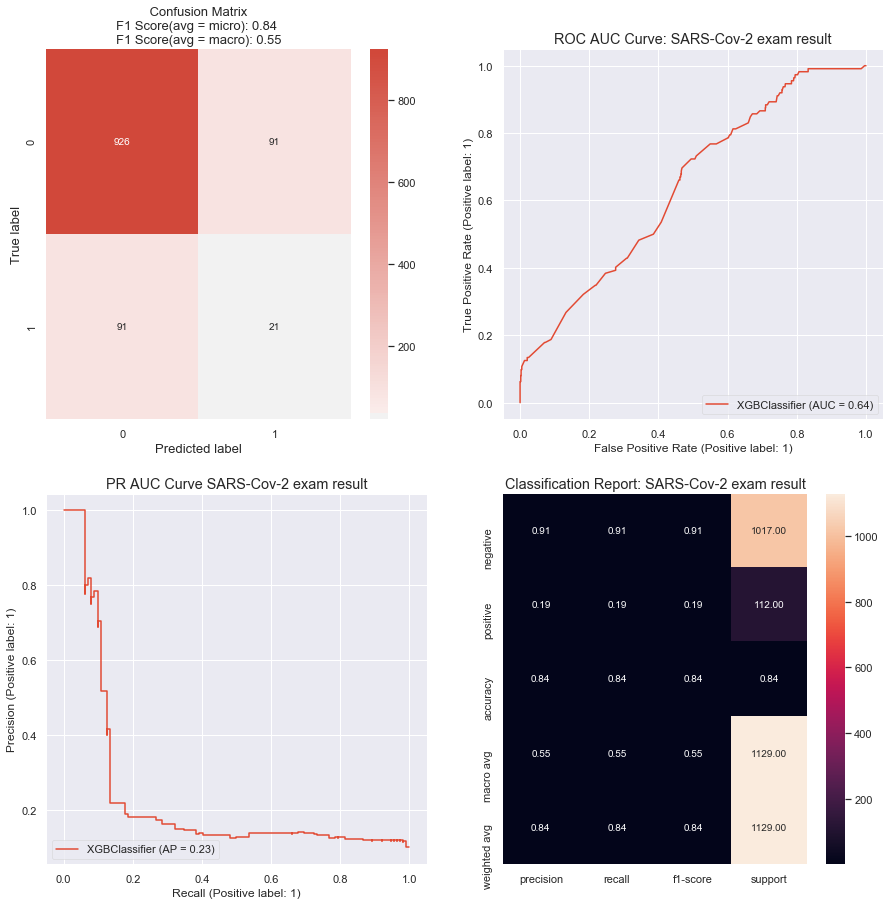

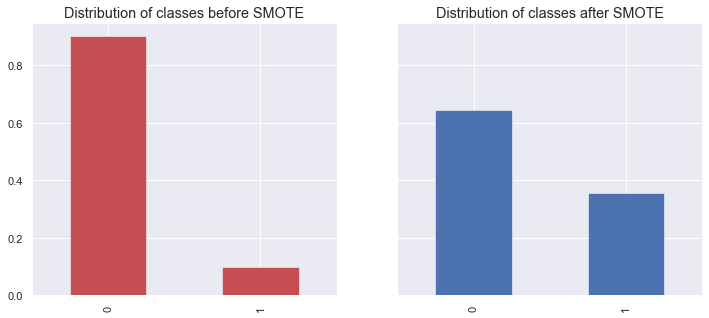

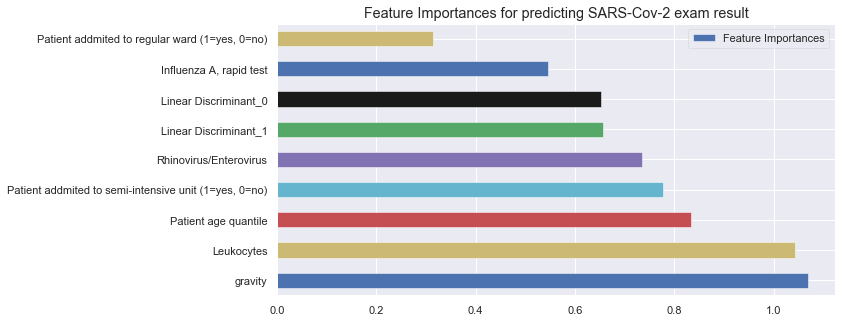

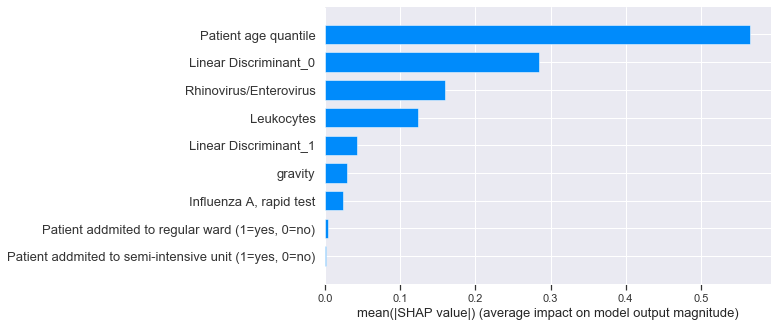

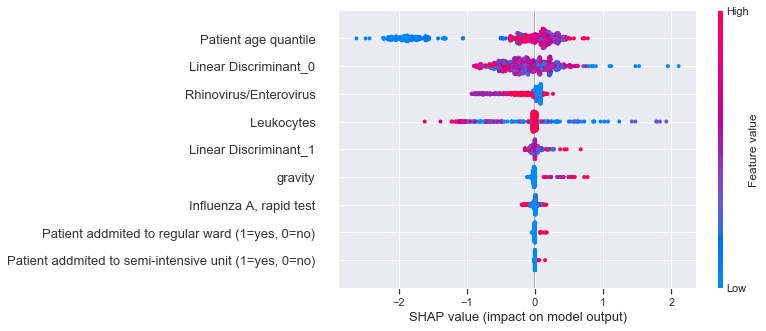

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 28
Writing Output files to disk...
    Saving predictions to .\SARS-Cov-2 exam result\SARS-Cov-2 exam result_Binary_Classification_test_modified.csv
    Saving predictions to .\SARS-Cov-2 exam result\SARS-Cov-2 exam result_Binary_Classification_submission.csv
    Saving predictions to .\SARS-Cov-2 exam result\SARS-Cov-2 exam result_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.5 for the Entire Process


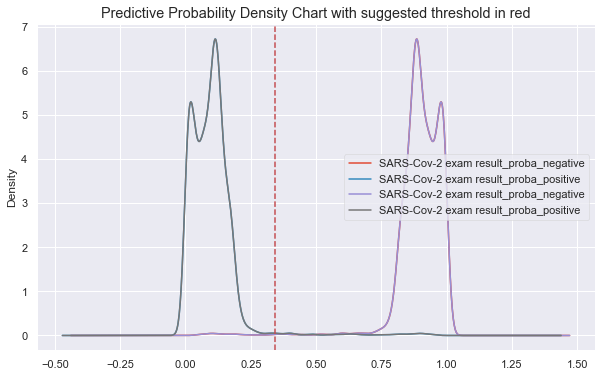

In [3]:
model, features, trainm, testm = Auto_ViML(
    train=data,
    target="SARS-Cov-2 exam result",
    test="",
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)

# Distribution:

In [4]:
import locale
locale.setlocale(locale.LC_ALL, 'nl_NL')
#df1 = pd.DataFrame()
def clean_col(data, column_name : str):
    df1 = data[column_name].dropna().reset_index(drop=True)
    for i in range(len(df1)):
        df1[i] = locale.atof(df1[i])
    return df1

In [5]:
df_1 = clean_col(data, 'Hemoglobin')

In [6]:
df_1

0     -0.02
1     -0.77
2     -0.59
3      0.79
4     -0.15
       ... 
598    0.17
599   -0.52
600    1.11
601   -2.78
602    0.54
Name: Hemoglobin, Length: 603, dtype: object

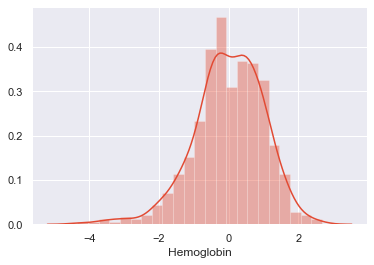

In [8]:
sns.set_style('darkgrid')
sns.distplot(df_1);
